# Homework 2 for CS 247 : Advanced Data Mining Learning

### Due: 11:59 pm 04/15

##### Please read the Homework Guidance (uploaded to CCLE) carefully and make sure you fulfill all the requirements.

__Name__: [Wei Zhou]

__UID__: [505650843]

## Problem 1:  Logistic Regression (55 pts)

Consider the Logistic Regression introduced in lecture 02 - Probabilistic Classifiers (please refer to page 26-37). In this problem, you are going to understand the derivations of Logistic Regression and apply it on a real-world classification task.

### Part 1: Logistic Regression Derivations (10pts)

Write down the matrix form operation for gradient vector and Hessian matrix for logistic regression

Hint: Please refer to the derivations on slide 35-36, and turn them into matrix form operations. 

#### Write Your answer here:

[Your Answer] https://drive.google.com/file/d/1laYuhkrniPaDcVJ-KBMDaWl6RFWrgjLX/view?usp=sharing

### Part 2: Sklearn Implementation (5 pts)

In this part, you are going to work on the classification task on the __breast_cancer__ dataset using the logistic regression function __LogisticRegression__ implemented in the sklearn package. We've provided the data processing parts, please implememt the code for training and testing. Please use variable name **pred_y** for your predicted test results.


__Hint__: 

1. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html to get familiar with the breast_cancer dataset.

2. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html to get familiar with sklearn LogisticRegression function.



In [6]:
# load dataset, split train and test 

from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing 
from numpy.linalg import inv
import numpy as np
import time

X, y = load_breast_cancer(return_X_y=True)
n_data, n_features = X.shape[0], X.shape[1]
ids  = np.arange(n_data)
np.random.seed(1)
np.random.shuffle(ids)
train_ids, test_ids = ids[: n_data // 2], ids[n_data // 2: ]

train_X, train_y = X[train_ids], y[train_ids]
test_X,  test_y  = X[test_ids],  y[test_ids]

In [7]:
# train and test with LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

'''
    TO DO: 
    Please implement train and test using sklearn LogisticRegression.
'''
#TODO
model = LogisticRegression()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)

# print the evaluation results
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       106
           1       0.98      0.97      0.97       179

    accuracy                           0.97       285
   macro avg       0.96      0.97      0.97       285
weighted avg       0.97      0.97      0.97       285



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Part 3: Your LogisticRegression Implementation (40pts = 10 + 10 + 15 + 5)

In this part, you are going to implement logistic regression function by your self. 

For optimizing Logistic Regression, you should implement the for-loop version (__forloop_GA_optimizer__) of Gradient Ascent algorithm, the matrix version (__matrix_GA_optimizer__) of Gradient Ascent algorithm, and matrix form Newton-Raphson algorithm (__matrix_Newton_optimizer__). Please use 1e-2 as your learning rate.

Then, you are going to get the predicted results using your own ***My_Logistic_Regression*** function with the for-loop version optimizer, the matrix version optimizer, and the Newton-Raphson optimizer. Please use variable name **my_pred_y** for your predicted test results.

Hint: The for-loop version would be very slow. So when you are debugging, you can first reduce the number of epochs (**n_epoch** in the **fit** function in **My_Logistic_Regression** class) to a small number such as 100, otherwise you may have to wait a really long time before getting some results. Then, after you make sure your code is bug-free, please use n_epoch = 10000 to report the results.

In [152]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#  Three different Optimizers


def forloop_GA_optimizer(W, X, y):
#     Gradient Ascent (GA) optimizer implemented with for loop.
#     Args:
#         W - Parameters, W is the weight; Beta 
#         X - Features of training batch/instance
#         y - Label(s) of training batch/instance
#     Return:
#         W_new - Updated W
    '''
        TO DO: 
        Please implement the for-loop version gradient ascent optimizer
        Please use 1e-2 as your learning rate.
    '''

    learning_rate = 0.01
    # Initialize beta with appropriate shape
    gradient =np.zeros(n_data)
    # Perform gradient ascent
    for j in range(n_features):
        gradient[j] = 0
        for i in range(n_data):
            #Output probability value by appplying sigmoid 
            p_i_beta = y - sigmoid(np.dot(X,W))
            gradient[j] = gradient[j] + p_i_beta[j]
        # Update the weights
        # It is gradient ASCENT not descent
        W[j] = W[j] + learning_rate * gradient[j]
    return W
    
def matrix_GA_optimizer(W, X, y):
#     Gradient Ascent (GA) optimizer implemented with matrix operations.
    '''
        TO DO: 
        Please implement the matrix version gradient ascent optimizer
        Please use 1e-2 as your learning rate.
    '''
    learning_rate = 0.01
    n_data = X.shape[0]
    # Output probability value by appplying sigmoid on itr 
    y_pred = sigmoid(np.dot(X,W))
    # Calculate the gradient values
    # This is just vectorized efficient way of implementing gradient.
    gradient = np.dot(X.T,(y - y_pred))/n_data
    W_updated = W + learning_rate * gradient

    return W_updated

def matrix_Newton_optimizer(W, X, y):
#     Newton's method optimizer implemented with matrix operations.
    '''
        TO DO:
        Please implement the matrix version newton-raphson optimizer
    '''
    
    alpha = 0.01
    # Define first deriv
    def nabla_f(W):
      return np.dot(X.T , y - sigmoid(np.dot(X,W)))/n_data
    # Define second deriv
    def nabla2_f(W):
      diag = np.diag(sigmoid(np.dot(X,W)) * (1-sigmoid(np.dot(X,W))))
      return -(np.dot(np.dot(X.T,diag),X) + alpha*np.identity(X.shape[1]))
    # Update Weight 
    W_updated = W - np.dot(np.linalg.inv(nabla2_f(W)),nabla_f(W))
    return W_updated

In [150]:
# Your own Logistic Regression Function

class My_Logistic_Regression():
#     Parameters
#     ----------
#         n_features : int, feature dimension
#         optimizer  : function, one optimizer that takes input the model weights
#                      and training data to perform one iteration of optimization.

    def __init__(self, n_features, optimizer):
        self.W = np.random.rand(n_features)
        self.optimizer = optimizer
        
    def fit(self, X, y):
#         iterate through batches or samples, then update W by one optimizer          
        n_epoch = 10000
        for epoch in range(n_epoch):
            self.W = self.optimizer(self.W, X, y)
            
            
    def predict(self, X):
        proba = sigmoid(np.dot(X,self.W))
        pred = proba
        pred[pred>=0.5] = 1
        pred[pred<0.5] = 0
        return pred
        
        

In [151]:
# Finally, train and test with your own My_Logistic_Regression function
# Compare the accuracy and running time of both optimization versions (for-loop and matrix).


for optimizer in [forloop_GA_optimizer, matrix_GA_optimizer, matrix_Newton_optimizer]:
    start_time = time.time()
    '''
        TO DO:
        Please implement train and test using your own My_Logistic_Regression.
    '''
    my_model = My_Logistic_Regression(n_features, optimizer)
    my_model.fit(train_X,train_y)
    my_pred_y = my_model.predict(test_X)
  
    end_time = time.time()
    print('Training time: %d s' % (end_time - start_time))
    print(classification_report(my_pred_y, test_y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Training time: 2358 s
              precision    recall  f1-score   support

         0.0       0.18      0.20      0.19       100
         1.0       0.55      0.52      0.53       185

    accuracy                           0.41       285
   macro avg       0.36      0.36      0.36       285
weighted avg       0.42      0.41      0.41       285

Training time: 0 s
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88        87
         1.0       0.99      0.88      0.94       198

    accuracy                           0.92       285
   macro avg       0.89      0.94      0.91       285
weighted avg       0.93      0.92      0.92       285

Training time: 6 s
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85       144
         1.0       0.80      0.99      0.88       141

    accuracy                           0.87       285
   macro avg       0.89      0.87      0.87       285
weighted avg  

## Problem 2: Kmeans Algorithm (25 pts)



Consider the Kmeans algorithm introduced in lecture 03 - K-Means and Mixture Model (please refer to page 6-19). In this problem, you are going to apply it on a real-world classification task on a synthetic dataset.

### Part 1: Sklearn Implementation (5 pts)

In this part, you are going to work on the clustering task on the synthetic dataset using the KMeans function implemented in the sklearn package. We've provided the data processing parts, please implememt the code for training and testing. Please use the variable name **syn_y_pred** for your predicted results.


Hint:
1. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html to get familiar with the make_blobs function we used to generate synthetic dataset.
2. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html to get familiar with the sklearn KMeans function.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


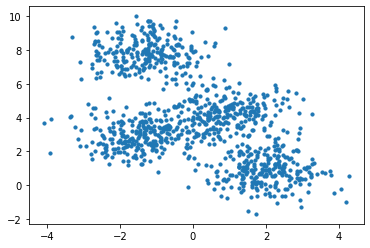

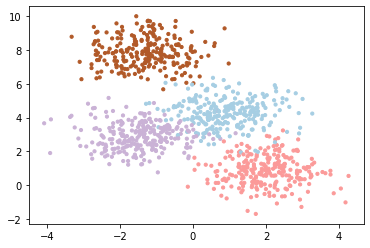

In [15]:
# generate synthetic dataset 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import distance 

# generate synthetic dataset
syn_X, syn_y = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=0.85)

# Visualize the blobs as a scatter plot

plt.scatter(syn_X[:, 0], syn_X[:, 1], s=10, cmap=plt.cm.Paired)
plt.show()

# Visualize with the ground-truth cluster results

plt.scatter(syn_X[:,0], syn_X[:,1], c=syn_y, s=10, cmap=plt.cm.Paired)
plt.show()

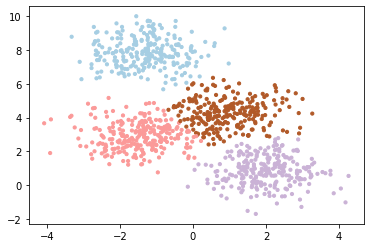

In [16]:
# Identify the clusters using the sklearn K-Means algorithm.

from sklearn.cluster import KMeans

'''
    To Do:
    Please implement train and test using sklearn K-means function.
    You can play with different parameters to see how the results change, 
    but please use n_cluster = 4, max_iter = 100 to report your results
'''
from sklearn import metrics
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=4,max_iter = 100, random_state=0)
syn_y_pred = kmeans.fit_predict(syn_X)

# Visualize with the predicted results

plt.scatter(syn_X[:,0], syn_X[:,1], c=syn_y_pred, s=10, cmap=plt.cm.Paired)
plt.show()

### Part 2: Your Kmeans Implementation (20pts = 15 + 5)

In this part, you are going to implement your own KMeans function, and use it on the clustering task on the synthetic dataset we generated before. Please use the variable name __my_syn_y_pred__ for your predicted results.

In [17]:
from scipy.spatial import distance
import pandas as pd

def my_KMeans(X, n_clusters = 4, max_iter=100):

#     X: multidimensional data
#     k: number of clusters
#     max_iter: number of repetitions before clusters are established
    
#     Return: class of each data point
    
    '''
        To Do: 
        Please implement your own Kmeans function.
    '''
    index = np.random.choice(len(X), n_clusters, replace = False)
    cts = X[index, :]
    class_p = np.argmin(distance.cdist(X, cts, 'euclidean'), axis = 1)
    for i in range(max_iter):
        cts = np.vstack([X[class_p == j, :].mean(axis = 0) for j in range(n_clusters)])
        temp = np.argmin(distance.cdist(X, cts, 'euclidean'), axis = 1)
        if np.array_equal(class_p,temp): break
        class_p = temp
    return class_p

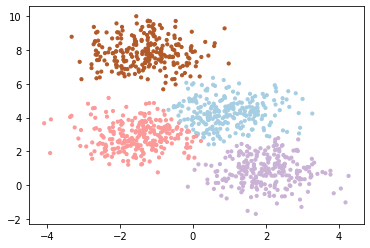

In [18]:
# Identify the clusters using your own K-Means implementation.
'''
    To Do:
    Please implement train and test using your own K-means function.
    Please use n_cluster = 4, max_iter = 100 to report your results
'''
my_syn_y_pred = my_KMeans(syn_X, n_clusters=4, max_iter = 100)

# Visualize with the ground-truth cluster results

plt.scatter(syn_X[:,0], syn_X[:,1], c=my_syn_y_pred, s=10, cmap=plt.cm.Paired)
plt.show()

## Problem 3:  Gaussian Mixture Model (20 pts)

Let $\mathcal{N}(x|\mu,\sigma^2)$ be the density for a Gaussian distribution with mean $\mu$ and variance $\sigma^2$. For the problem description in the following, we follow the notations in lecture 03 - K-Means and Mixture Model page 21 - 30.

Consider a Gaussian mixture model, in which the probability density for an observation x is:
$$(1/2)\mathcal{N}(x|\mu, 1) + (1/2)\mathcal{N}(x|\mu, 4)$$
Please note that the two components have the same mean $\mu$, and their standard deviations are fixed at 1 and 2 respectively.

Now, let's estimate the parameter $\mu$ by maximum likelihood using the EM algorithm. Suppose we have three data data points: 2.0, 4.0, 4.6.

Please answer the two questions in part 1 and part 2.

Hint: You may find the following table of standard normal probability densities useful:

| x         | 0    | 0.1  | 0.2  | 0.3  | 0.4  | 0.5  | 0.6  | 0.7  | 0.8  | 0.9  | 1.0  | 1.1  | 1.2  | 1.3  | 1.4  | 1.5  | 1.6  | 1.7  | 1.8  | 1.9  | 2.0 |
|-----------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|-----|
| N(x\|0,1) | .40  | .40  | .39  | .38  | .37  | .35  | .33  | .31  | .29  | .27  | .24  | .22  | .19  | .17  | .15  | .13  | .11  | .09  | .08  | .07  | .05 |

### Part 1: E-step (10pts)

Suppose the model parameter estimated from the previous M step is $\mu^t$ = 4. Then for the current E-step, compute all the $w^{t+1}_{ij}$ for $i\in\{1,2,3\}$ and $j\in\{1,2\}$. 

Reminder: $w^{t+1}_{ij} = p(z_i=j|\mu^t, x_i)$ indicates the probability that the i-th data point is assigned to cluster j.


Hint: 

1. Since the probabilities for the two components must add to one (i.e. $\sum_j w_{ij}=1$, once we have $w^{t+1}_{i1}$, we can quickly obtain $w^{t+1}_{i2} = 1 - w^{t+1}_{i1}$.
2. The normal density function with mean $\mu$ and variance $\sigma^2$ is $\mathcal{N}(x|\mu, \sigma^2) =(1/\sigma)\mathcal{N}(\frac{x − \mu}{\sigma}|0, 1)$. Also we have $\mathcal{N}(−x|0, 1) = \mathcal{N}(x|0, 1)$.


#### Write Your answer here:

[Your Answer] https://drive.google.com/file/d/1BilJEmTfTciLSqoEZMKEtYab4KmT-Z0h/view?usp=sharing

### Part 2: M-step (10pts)

With your results in part 1, find the estimate for $\mu^{t+1}$ that will be found in the next M step. 

Hint: Since the two components share one parameter $\mu$ in this problem, we can not directly compute the updated $\mu^{t+1}$ with the formulas on slide page 27. You should first write down the expected log likelihood for this problem, then take the derivative with respect to $\mu$, then setting the derivative to 0 and get the updated $\mu^{t+1}$.


#### Write Your answer here:

[Your Answer]  https://drive.google.com/file/d/19sYGv066og0Z62bKKcgpZCylL7tm9y8b/view?usp=sharing

# Citation

Optimizer:
https://beckernick.github.io/logistic-regression-from-scratch/
https://medium.com/@papillonbee/logistic-regression-from-scratch-with-gradient-descent-and-newtons-method-ff4307e3cb30
http://fourier.eng.hmc.edu/e176/lectures/NM/node21.html
https://omyllymaki.medium.com/gauss-newton-algorithm-implementation-from-scratch-55ebe56aac2e

https://github.com/abhishekshakya/Logistric-regression-implementation/blob/master/logis.py

Kmeans:
https://www.askpython.com/python/examples/k-means-clustering-from-scratch
https://gdcoder.com/implementation-of-k-means-from-scratch-in-python-9-lines/


EM & GMM: https://www.ee.bgu.ac.il/~haimp/ml/lectures/lec2/lec2.pdf
https://www.informit.com/articles/article.aspx?p=363730&seqNum=2

Study group: Lucius Wang, Jessica Bojorquez, thank you Yewen for your help! 
